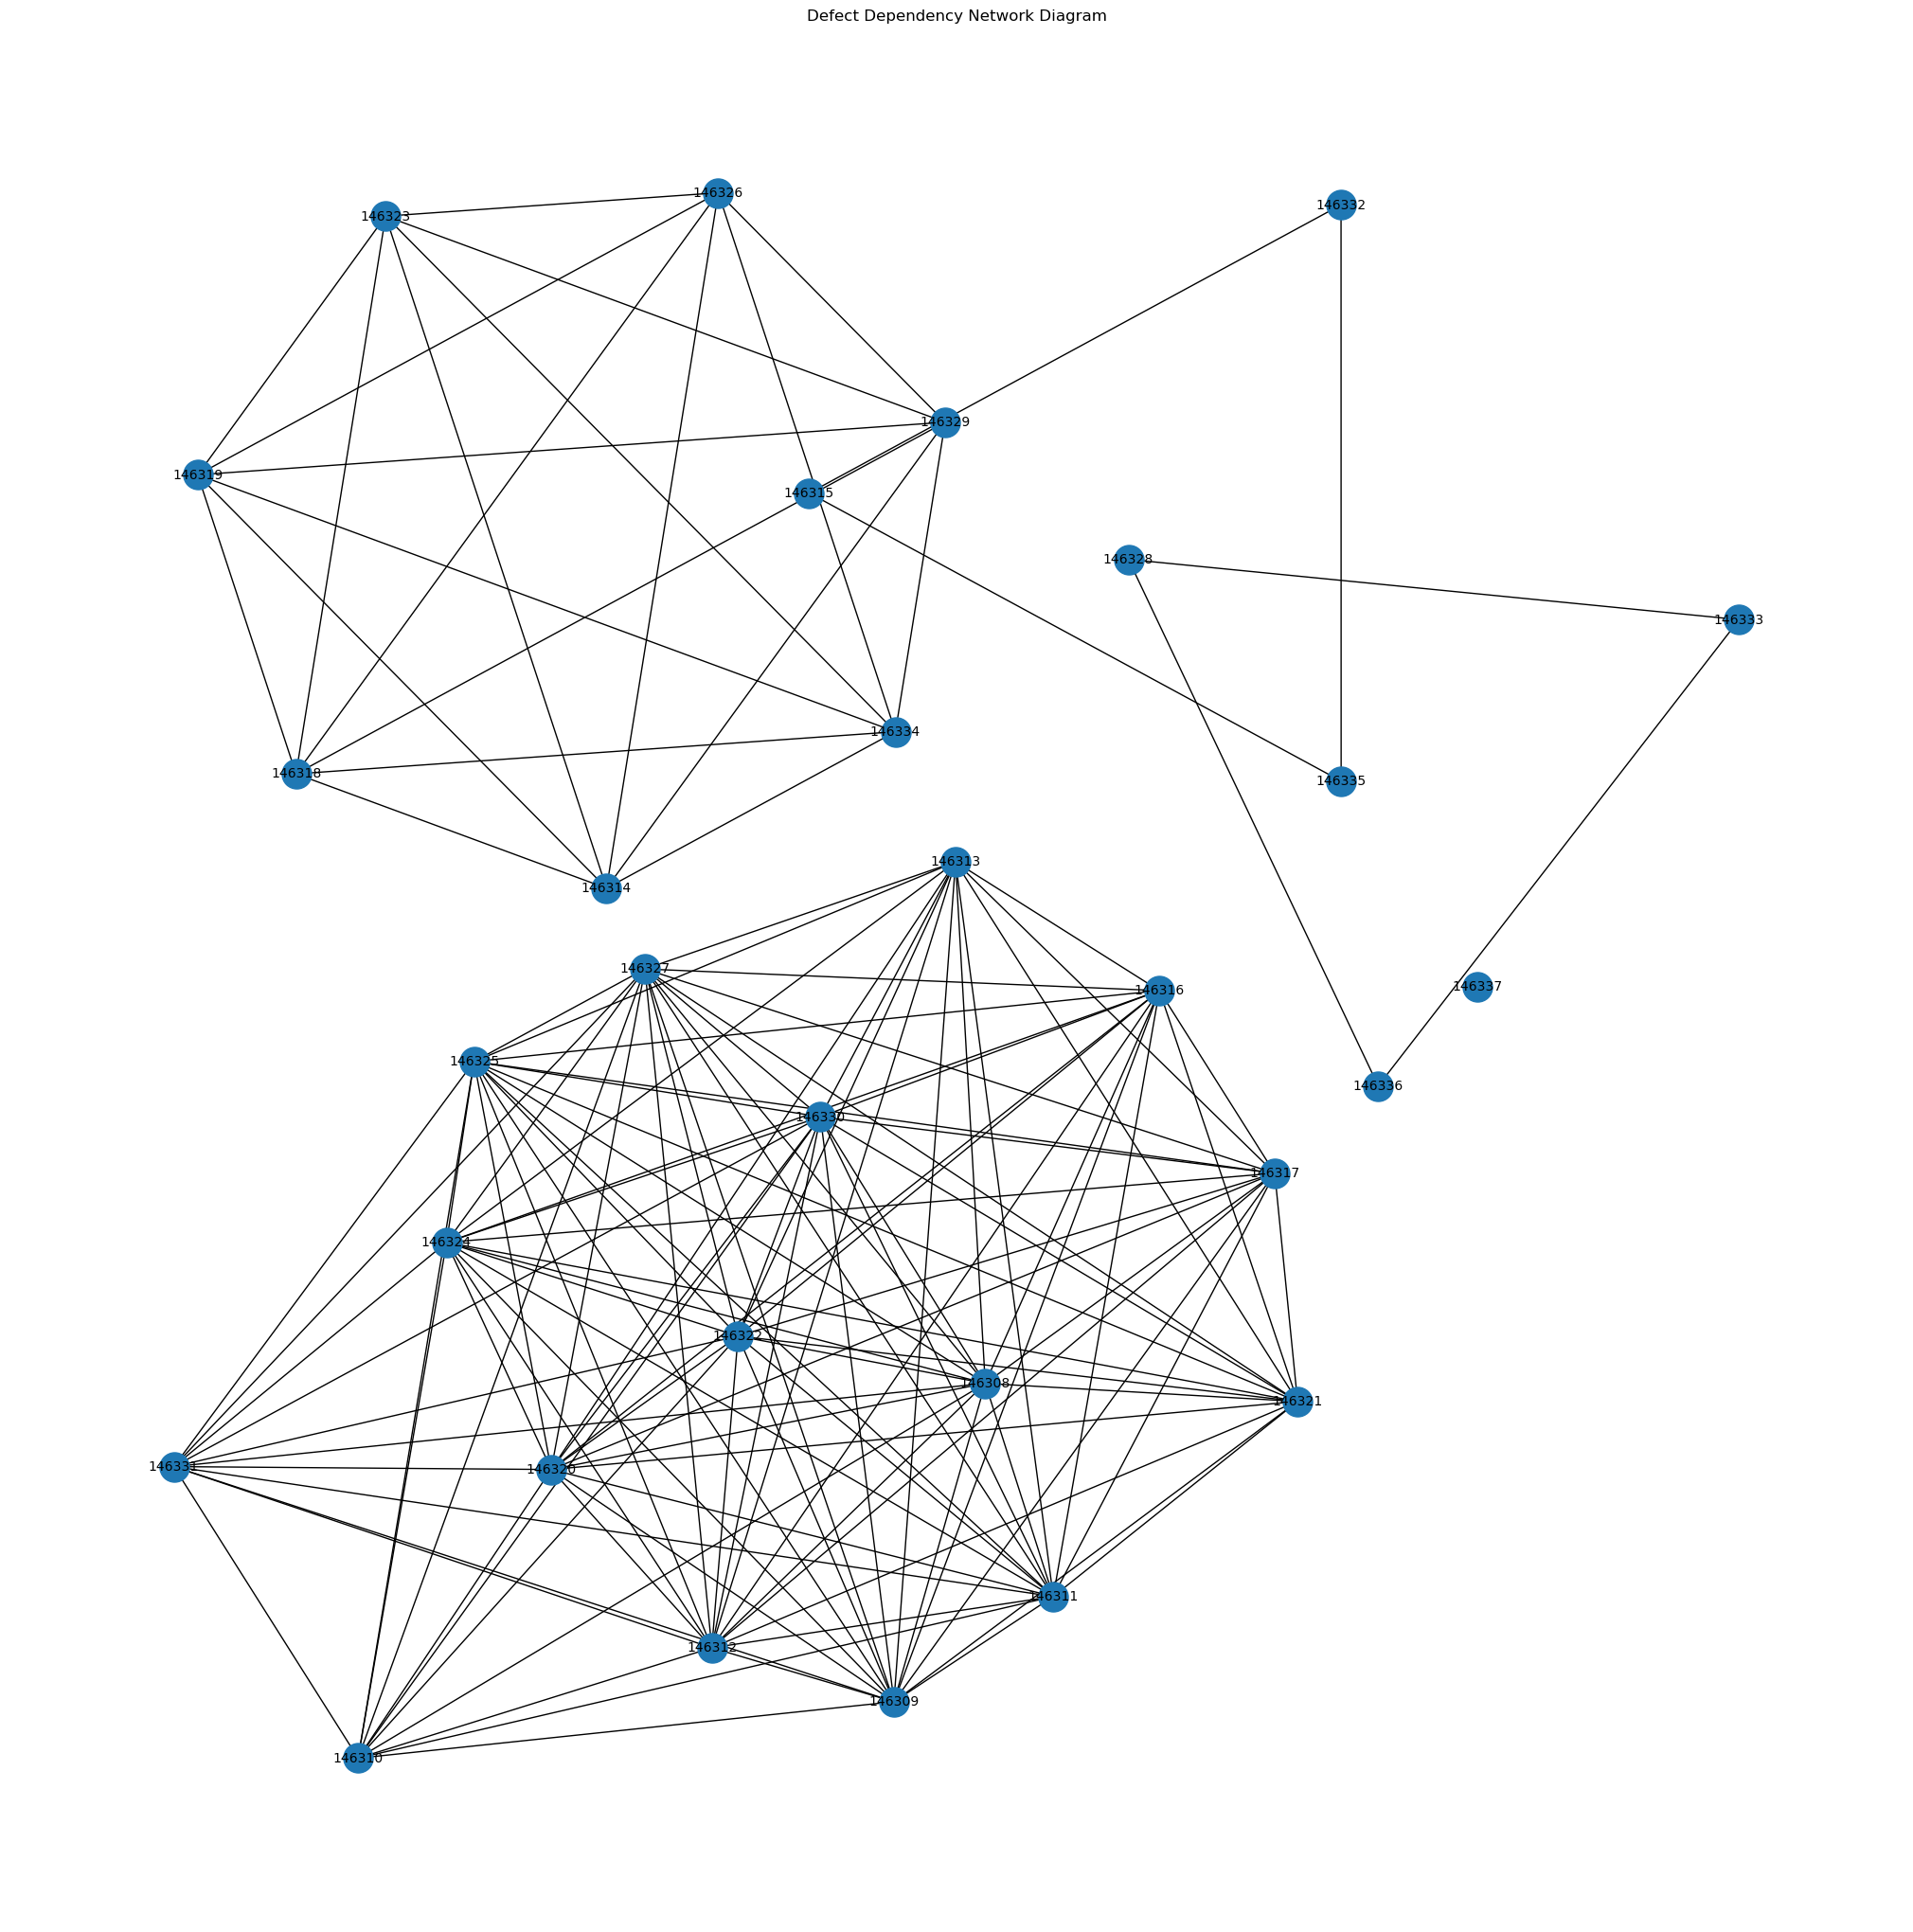

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the JSON data
file_path = '../flutter_30-issues.json'
issues_data = pd.read_json(file_path)

# Create a graph
G = nx.Graph()

# Populate the graph with nodes and edges
for _, row in issues_data.iterrows():
    issue_number = row['number']
    G.add_node(issue_number, issue_title=row['title'][:50])  # Truncate title for readability

    # Assuming each label might connect this issue with others sharing the label
    for label in row['labels']:
        label_name = label['name']
        # Add edges between this issue and all other issues sharing this label
        for _, other_row in issues_data.iterrows():
            if other_row['number'] != issue_number and any(label['name'] == label_name for label in other_row['labels']):
                G.add_edge(issue_number, other_row['number'])

# Adjust the figure size and layout to reduce overlap
plt.figure(figsize=(20, 20))  # Increase the figure size
pos = nx.kamada_kawai_layout(G)  # A layout that can help minimize node overlap

# Draw the network
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10)  # Adjust node size and font size
plt.title('Defect Dependency Network Diagram')
plt.axis('off')  # Turn off the axis
plt.show()


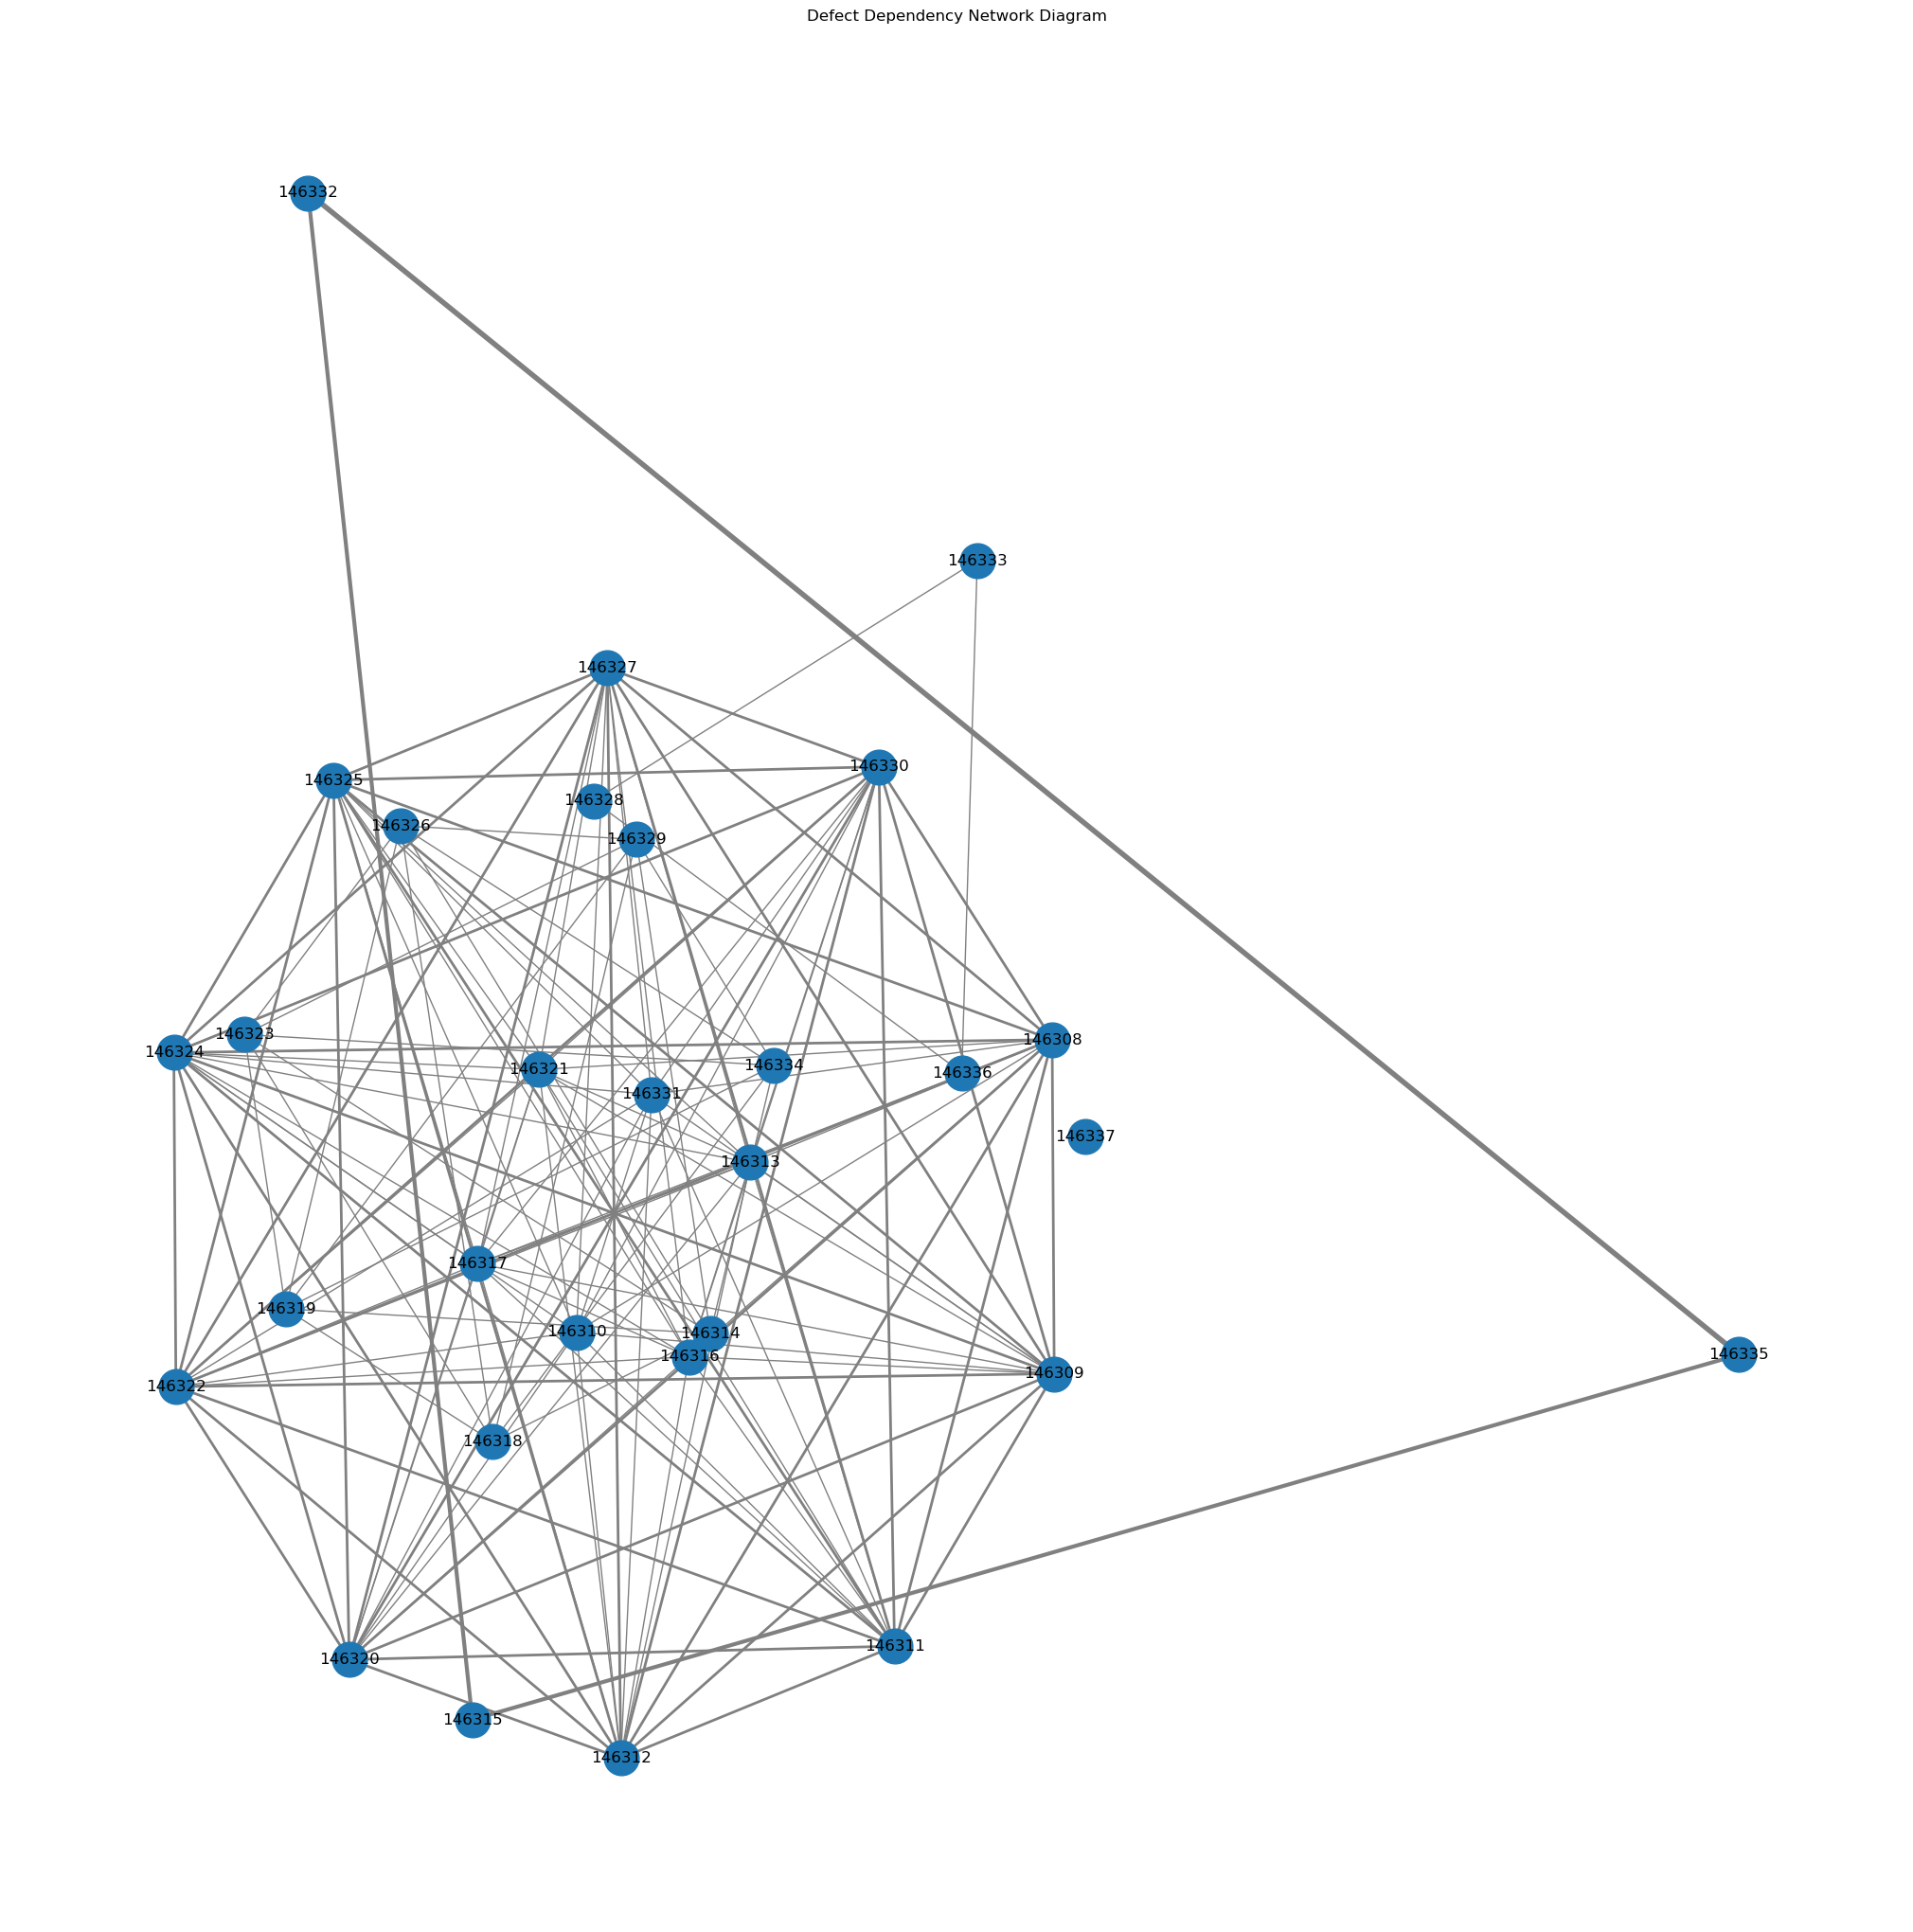

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the JSON data
file_path = '../flutter_30-issues.json'  # Update the file path as needed
issues_data = pd.read_json(file_path)

# Create a graph
G = nx.Graph()

# Helper function to get labels as a set for an issue
def get_label_set(issue):
    return set(label['name'] for label in issue['labels'])

# Populate the graph with nodes
for _, row in issues_data.iterrows():
    issue_number = row['number']
    G.add_node(issue_number, issue_title=row['title'][:50])  # Truncate title for readability

# Populate the graph with edges, including strength value
for index, issue in issues_data.iterrows():
    issue_number = issue['number']
    issue_labels = get_label_set(issue)

    for other_index, other_issue in issues_data.iterrows():
        other_issue_number = other_issue['number']
        if issue_number != other_issue_number:  # Avoid self-loops
            other_issue_labels = get_label_set(other_issue)
            shared_labels = issue_labels & other_issue_labels  # Intersection gives shared labels
            
            if shared_labels:  # If there are shared labels, add an edge
                # Edge 'weight' could represent the strength (number of shared labels)
                G.add_edge(issue_number, other_issue_number, weight=len(shared_labels))

# Adjust the figure size and layout to reduce overlap
plt.figure(figsize=(20, 20))
pos = nx.kamada_kawai_layout(G)  # A layout that can help minimize node overlap

# Draw the network, adjusting edge width based on the 'weight' attribute
edge_widths = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, pos, with_labels=True, node_size=700, width=edge_widths, font_size=12, edge_color='grey')

plt.title('Defect Dependency Network Diagram')
plt.axis('off')
plt.show()

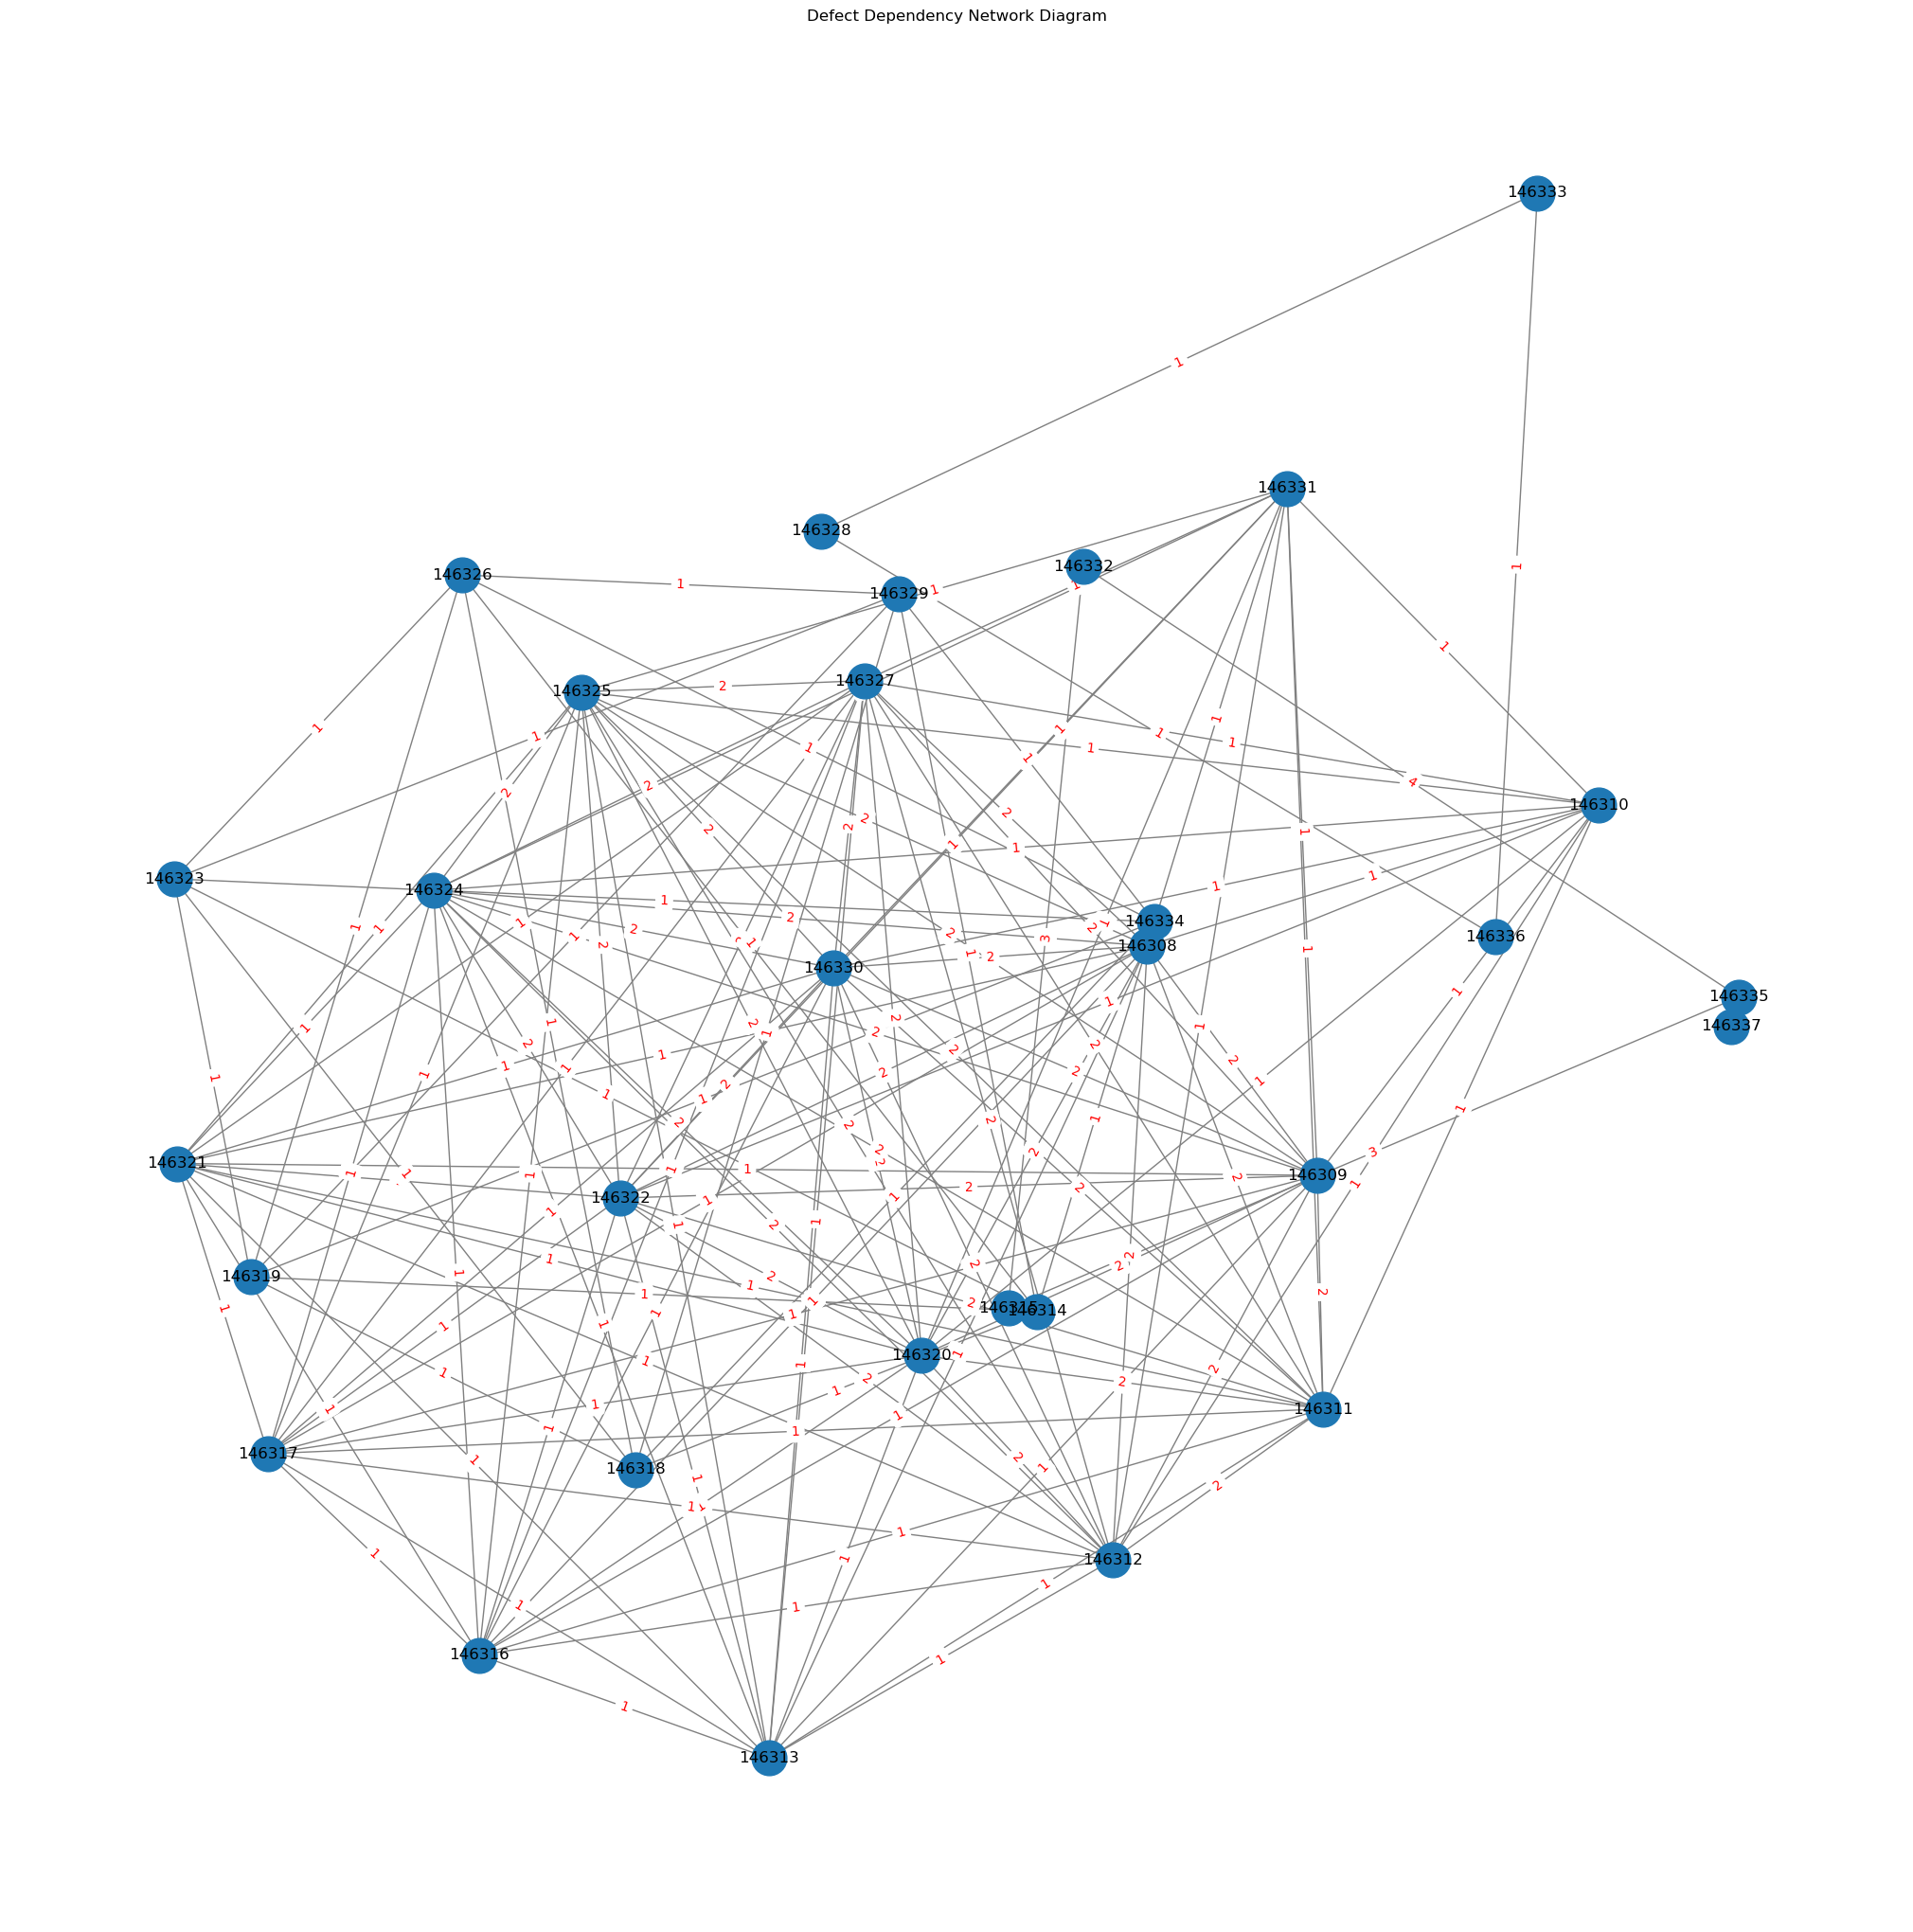

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the JSON data
file_path = '../flutter_30-issues.json'  # Update the file path as needed
issues_data = pd.read_json(file_path)

# Create a graph
G = nx.Graph()

# Helper function to get labels as a set for an issue
def get_label_set(issue):
    return set(label['name'] for label in issue['labels'])

# Populate the graph with nodes
for _, row in issues_data.iterrows():
    issue_number = row['number']
    G.add_node(issue_number, issue_title=row['title'][:50])  # Truncate title for readability

# Populate the graph with edges and calculate strength
edge_labels = {}
for index, issue in issues_data.iterrows():
    issue_number = issue['number']
    issue_labels = get_label_set(issue)

    for other_index, other_issue in issues_data.iterrows():
        other_issue_number = other_issue['number']
        if issue_number != other_issue_number:  # Avoid self-loops
            other_issue_labels = get_label_set(other_issue)
            shared_labels = issue_labels & other_issue_labels  # Intersection gives shared labels
            
            if shared_labels:  # If there are shared labels, add an edge
                # Use the number of shared labels as the 'strength'
                G.add_edge(issue_number, other_issue_number)
                edge_labels[(issue_number, other_issue_number)] = str(len(shared_labels))

# Adjust the figure size and layout to reduce overlap
plt.figure(figsize=(20, 20))
pos = nx.kamada_kawai_layout(G)  # A layout that can help minimize node overlap

# Draw the network
nx.draw(G, pos, with_labels=True, node_size=700, font_size=12, edge_color='grey')

# Draw edge labels (the strength values)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('Defect Dependency Network Diagram')
plt.axis('off')
plt.show()
